In [1]:
'''This code needs to take the Image_CAS_gini_M20 output (which includes r_e)
as well as the output from the Summit velocity maps and make an input to kinemetry
with a hexagonal mask'''


'This code needs to take the Image_CAS_gini_M20 output (which includes r_e)\nas well as the output from the Summit velocity maps and make an input to kinemetry\nwith a hexagonal mask'

In [877]:
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.cosmology import WMAP9 as cosmo
import matplotlib
import math
print(os.getcwd())

/Volumes/My Passport for Mac/LAURA_Sims/kinemetry_input


In [956]:

os.chdir(os.path.expanduser('/Volumes/My Passport For Mac/LAURA_SIMS'))
view=6
convolve=2
if view==0:#for grid
    x_start=178.7
    y_start=200.4
    PA_kin=77.9 
'''if view==0:
    x_start=178.7
    y_start=200.4
    PA_kin=77.9'''
if view==1:
    x_start=156.861508075
    y_start=199.834653691
    PA_kin=83.1
if view==2:
    x_start=155.367726938
    y_start= 97.9338219573
    PA_kin=36.1
if view==3:
    x_start=130.224791408
    y_start=148.524407105
    PA_kin=141.2
if view==4:
    x_start=130.899169371
    y_start=200.407107373
    PA_kin=42.3
if view==5:
    x_start=169.205445019
    y_start=200.10469591
    PA_kin=155.4
if view==6:
    x_start=118.265804413 
    y_start=149.034297007
    PA_kin=8.3
if convolve !=1:
    x_start=x_start/2
    y_start=y_start/2
output_number=200

output='GALFIT_folder/out_'+str(view)+'_'+str(output_number)+'.fits'
out=pyfits.open(output)
r_e=out[2].header['1_RE']
#print(out[2].header)
print(float(r_e[0:5]))

'''also figure out where the center is'''
print(out[2].header['1_XC'])
print(out[2].header['1_YC'])





print(out[2].header)


'''But this effective radius is in pixels, so how do we convert it to arcsec?'''
redshift=0.03
kpc_arcmin=cosmo.kpc_proper_per_arcmin(redshift)#insert the redshift  
    #print(kpc_arcmin.value/60, 'kpc per arcsec')
'''Divide the pixelscale (kpc) by kpc/arcsec to get arcsec
    size of pixels'''
image='q0.5_fg0.3_allrx10/broadband_'+str(output_number)+'.fits'
im=pyfits.open(image)

pixelscale =  im['CAMERA'+str(view)+'-BROADBAND'].header['CD1_1']
print('pixelscale', pixelscale)
size_a=2*pixelscale/(kpc_arcmin.value/60)
'''Because we convolved spatially by a factor of 2 to be close to 0.5" pixels'''
print('size of a pixel in arcsec', size_a)
print('2*r_e in arcsec',1.5*2*float(r_e[0:5])*size_a)
arcs_totes=1.5*2*float(r_e[0:5])*size_a
#kinemetry_input_append_x.txt

contours=im['CAMERA'+str(view)+'-BROADBAND'].data[2]
contours=convolve_spatially(contours,2,'no')


'''
plt.imshow(im['CAMERA'+str(view)+'-BROADBAND'].data[2], vmax=10)#,norm=matplotlib.colors.LogNorm()
plt.colorbar()
plt.show()
'''



10.25
92.5620 +/- 0.0091
91.6929 +/- 0.0112
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                  182 / Length of data axis 1                          NAXIS2  =                  182 / Length of data axis 2                          OBJECT  = 'model   '           / Component type                                 COMMENT ========== GALFIT Input Parameters ==========                           INITFILE= 'galfit.feedme_6_200' / GALFIT input file                             DATAIN  = 'out_convolved_6_200.fits' / Input data image                         SIGMA   = 'out_sigma_convolved_6_200.fits' / Input sigma image                  PSF     = 'none    '           / Convolution PSF and kernel                     CONSTRNT= 'none    '           / Parameter constraint file                  

"\nplt.imshow(im['CAMERA'+str(view)+'-BROADBAND'].data[2], vmax=10)#,norm=matplotlib.colors.LogNorm()\nplt.colorbar()\nplt.show()\n"

In [957]:
def convolve_spatially(input_data,factor, plot):
    if ((len(input_data[:,0])/factor).is_integer()):
        length=int(len(input_data[:,0])/factor)
    else:
        stop


    data_new = np.zeros(( length, length))

    data_new += input_data[ ::factor, ::factor] + input_data[ 1::factor, ::factor] + input_data[ ::factor, 1::factor] + input_data[ 1::factor, 1::factor]# Take (0,0)                                                                                                               \
                                                                                                                                                

    return data_new


In [958]:
PA_img=(float(out[2].header['1_PA'][:5]))
print(PA_img)

-17.9


In [959]:
if arcs_totes > 32.5:
    n_fibers=127
    dia = 32.5/size_a
else:
    if arcs_totes > 27.5:
        n_fibers=91
        dia = 27.5/size_a
    else:
        if arcs_totes > 22.5:
            n_fibers=61
            dia=22.5/size_a
        else:
            if arcs_totes > 17.5:
                n_fibers=37
                dia=17.5/size_a
            else:
                n_fibers=19
                dia = 12.5/size_a
print(n_fibers,'fibers', 'diameter', dia)

19 fibers diameter 22.752186346773655


In [960]:
'''extract a square around the center of the velocity map'''
print(os.getcwd())
os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs')) # path to the simulated images
print(os.getcwd())
old_kin='kinemetry_input_append_54_'+str(view)+'.txt'
size=91

/Volumes/My Passport for Mac/LAURA_Sims
/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs


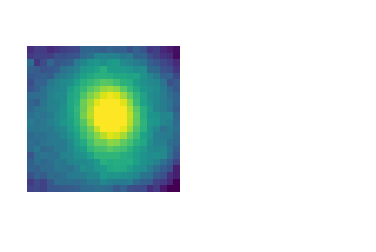

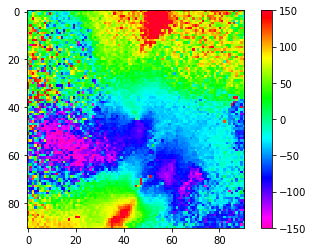

In [961]:

with open(old_kin, 'r') as f:
    data = f.readlines()
    #print(data)
    stel_vel_all=np.zeros((size,size))
    stel_vel_e=np.zeros((size,size))
    stel_disp=np.zeros((size,size))
    stel_disp_e=np.zeros((size,size))
    
    x_list=[]
    y_list=[]
    vel_list=[]
    vel_e_list=[]
    sig_list=[]
    sig_e_list=[]


    for line in data:
        words = line.split()

        if (words[0]) != 'Beginning':
            
            x_list.append(float(words[0]))
            y_list.append(float(words[1]))
            vel_list.append(float(words[2]))
            vel_e_list.append(float(words[3]))
            sig_list.append(float(words[4]))
            sig_e_list.append(float(words[5]))
            
            xs=int(round(float(words[0]),0))
            ys=int(round(float(words[1]),0))
            stel_vel_all[xs,ys] = float(words[2])
                

            '''xs=int(round(float(words[0]),0))
            ys=int(round(float(words[1]),0))

            
            if float(words[2]) !=0:

                #if float(words[3]) > 0.1:#abs(float(words[3])/float(words[2])) < 0.2:
                stel_vel[xs,ys] = float(words[2])
                stel_vel_e[xs,ys] = float(words[3])

                stel_disp[xs,ys] = float(words[4])
                stel_disp_e[xs,ys] = float(words[5])
                
                
                
            else:
                stel_vel[xs,ys] = 0
                stel_vel_e[xs,ys] = 0

                stel_disp[xs,ys] = 0
                stel_disp_e[xs,ys] = 0
plt.imshow(np.flipud(np.rot90(stel_vel)), vmin=-150, vmax=150, cmap='gist_rainbow_r')
plt.colorbar()
plt.show()

cen_x=size/2
cen_y=size/2'''
plt.clf()           
plt.imshow(((stel_vel_all)), cmap='gist_rainbow_r', vmin=-150, vmax=150)
plt.colorbar()
plt.show()

In [962]:
'''Now, make a mask'''
'''
Each pixel is 0.5"
We know the map is already centered
Try sending the whole thing into kinemetry
XBIN = x_cen-x; x_cen is size/2
'''

'''
Argh really not looking forward to possibly constructing a hexagonal mask myself
'''


from matplotlib import path
print('size/2', size/2)
print('radius in pixels', (dia-0.5)/2)
print('extent', size/2-(dia-0.5)/2, size/2+(dia-0.5)/2)
print('diameter', (dia-0.5))
print('difference', ((dia-0.5))/math.tan(math.radians(60))-(size/2-(dia-0.5)/2))
diff_x=((dia-0.5))/math.tan(math.radians(60))-(size/2-(dia-0.5)/2)
diff_here=((dia-0.5/size_a)/2)/math.tan(math.radians(60))
radius=(dia-0.5/size_a)/2


poly_verts = path.Path([ (size/2,size/2-(dia-0.5)/2), (size/2+(dia-0.5)/2,((dia-0.5))/math.tan(math.radians(60))),
                        (size/2+(dia-0.5)/2,size/2+(dia-0.5)/2-diff_x), (size/2, size/2+(dia-0.5)/2),
                        (size/2-(dia-0.5)/2,size/2+(dia-0.5)/2-diff_x),
                       (size/2-(dia-0.5)/2,((dia-0.5))/math.tan(math.radians(60)))])

poly_verts = path.Path([ (size/2,size/2-radius), (size/2+radius,size/2-radius+diff_here),
                        (size/2+radius,size/2+radius-diff_here), (size/2, size/2+radius),
                        (size/2-radius,size/2+radius-diff_here),
                       (size/2-radius,size/2-radius+diff_here)])




'''poly_verts = path.Path([(size/2-(dia-0.5),size/2-(dia-0.5)), (size/2+(dia-0.5),size/2-(dia-0.5)),
                        (size/2+(dia-0.5),size/2+(dia-0.5)), (size/2-(dia-0.5),size/2+(dia-0.5))])

poly_verts = path.Path([(size/2,size/2-(dia-0.5)), (size/2+(dia-0.5),size/2-(dia-0.5)),
                        (size/2+(dia-0.5),size/2+(dia-0.5)), (size/2-(dia-0.5),size/2+(dia-0.5))])'''


print(poly_verts)
xy=np.column_stack((x_list,y_list))

inside=poly_verts.contains_points(xy)

'''
The input to contains_points must be an array with x and y coordinates (blah)
'''


print(np.shape(inside))
print(np.shape(vel_list))

size/2 45.5
radius in pixels 11.126093173386828
extent 34.37390682661317 56.62609317338683
diameter 22.252186346773655
difference -21.526601049245684
Path(array([[ 45.5       ,  34.57895055],
       [ 56.42104945,  40.88422139],
       [ 56.42104945,  50.11577861],
       [ 45.5       ,  56.42104945],
       [ 34.57895055,  50.11577861],
       [ 34.57895055,  40.88422139]]), None)
(8281,)
(8281,)


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(91, 91)


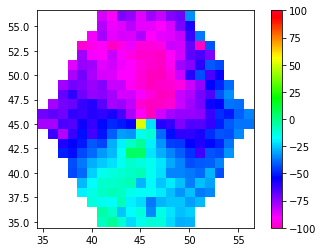

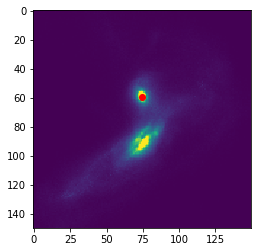

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


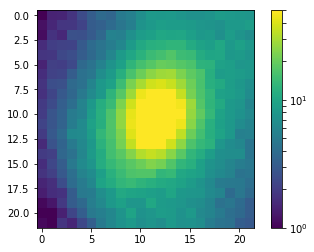

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:83: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


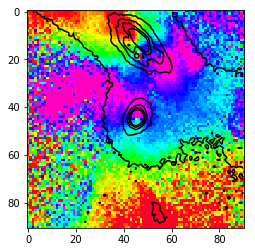

"\n\n    \n    \n    Z = np.array(np.rot90(np.sum(CAMERA0.data[:,x1:x2,y1:y2],axis=0)))\n    #there was a np.rot90 for the contours here\n    \n    \n    \n    levels = np.arange(10**4, 10**5.5, 10**5)\n    \n    fig = plt.figure()\n    ax1 = fig.add_subplot(111, aspect='equal')\n    im1 = ax1.contour(X, Y, Z, levels, colors='black', linewidths=1)\n"

In [963]:
'''
So now I need to mask out everything that is False in inside
'''

stel_vel=np.zeros((size,size))
stel_vel_e=np.zeros((size,size))
stel_disp=np.zeros((size,size))
stel_disp_e=np.zeros((size,size))

x_list_after=[]
y_list_after=[]
vel_list_after=[]
vel_e_list_after=[]
sig_list_after=[]
sig_e_list_after=[]

for i in range(len(inside)):
    if inside[i]==True:
        
        '''Then do all the stuff'''
        x_list_after.append(x_list[i])
        y_list_after.append(y_list[i])
        vel_list_after.append(vel_list[i])
        vel_e_list_after.append(vel_e_list[i])
        sig_list_after.append(sig_list[i])
        sig_e_list_after.append(sig_e_list[i])

        xs=x_list[i]
        ys=y_list[i]

        '''if float(words[2]) != 0 and float(words[4]) != 0:

            if abs(float(words[3])/float(words[2])) < 10 and abs(float(words[5])/float(words[4])) < 10:
             '''   
        stel_vel[xs,ys] = vel_list[i]
        stel_vel_e[xs,ys] = vel_e_list[i]

        stel_disp[xs,ys] = sig_list[i]
        stel_disp_e[xs,ys] = sig_e_list[i]

        '''else:
                stel_vel[xs,ys] = 0
                stel_vel_e[xs,ys] = 0

                stel_disp[xs,ys] = 0
                stel_disp_e[xs,ys] = 0'''
        
        
        
rotated= stel_vel#np.flipud(np.rot90(
rotated=ma.masked_where(rotated==0, rotated)
print(np.shape(rotated))

rotated_sig= stel_disp
rotated_sig=ma.masked_where(rotated==0, rotated_sig)
plt.imshow(rotated, vmin=-100, vmax=100, cmap='gist_rainbow_r')
plt.colorbar()
plt.xlim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.ylim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.show()



cen_x=size/2
cen_y=size/2

size_cont=91
plt.imshow(contours, vmax=50)
plt.scatter(y_start,x_start, color='red')
plt.show()


x = np.arange(0, size_cont, 1)
yz = np.arange(0, size_cont, 1)


plt.imshow(np.flipud(contours[x_start-(dia-0.5)/2:x_start+(dia-0.5)/2,y_start-(dia-0.5)/2:y_start+(dia-0.5)/2]), vmin=1,vmax=50,norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()



Z = np.array(contours[x_start-size_cont/2:x_start+size_cont/2,y_start-size_cont/2:y_start+size_cont/2])

X, Y = np.meshgrid(x, yz)

levels = np.arange(1, 50, 10)

plt.imshow(np.flipud(stel_vel_all), vmin=-100, vmax=100, cmap='gist_rainbow_r')
plt.contour(X, Y, np.flipud(Z), levels, colors='black', linewidth=2, zorder=1000)
plt.show()

'''overdraw a line with a slope'''
ys=[(j-size_cont/2)/math.tan(math.radians(-PA_img))+size_cont/2 for j in x]

fig=plt.figure()
ax1=fig.add_subplot(111)
im1=ax1.imshow((rotated), vmin=-100, vmax=100, cmap='gist_rainbow_r')
ax1.contour(X, Y, Z, levels, colors='black', linewidth=2, zorder=1000)
ax1.plot(x, ys, color='black',lw=2)
#plt.colorbar()
plt.xlim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.ylim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
#ax1.axis('Off')
plt.colorbar(im1)
yticks=[size/2-(dia-0.5)/2 ,size/2    ,size/2+(dia-0.5)/2]

ylabels=[round((size/2-x)*size_a,1) for x in yticks]
xlabels=[round((x-size/2)*size_a,1) for x in yticks]

ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xticks(yticks)
ax1.set_xticklabels(xlabels)
ax1.set_ylabel(r'Spatial Position [$^{\prime\prime}$]')
ax1.set_xlabel(r'Spatial Position [$^{\prime\prime}$]')

os.chdir(os.path.expanduser('/Volumes/My Passport For Mac/LAURA_SIMS/kinemetry_input/'))

plt.savefig('../../MaNGA_Papers/Paper_I/vel_hexagon_'+str(view)+'.pdf')

'''

    
    
    Z = np.array(np.rot90(np.sum(CAMERA0.data[:,x1:x2,y1:y2],axis=0)))
    #there was a np.rot90 for the contours here
    
    
    
    levels = np.arange(10**4, 10**5.5, 10**5)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')
    im1 = ax1.contour(X, Y, Z, levels, colors='black', linewidths=1)
'''

In [964]:
#def new_kinemetry(masked, masked_e, masked_d, masked_d_e, middle_x, middle_y):
'''
x_list.append(float(words[0]))
y_list.append(float(words[1]))
vel_list.append(float(words[2]))
vel_e_list.append(float(words[3]))
sig_list.append(float(words[4]))
sig_e_list.append(float(words[5]))
''' 
#os.chdir(os.path.expanduser('~/Documents/LAURA_Sims/'))
print(os.getcwd())
file2=open('../../../kinemetry_input/kinemetry_200_'+str(view)+'.txt','w')
file2.write('#'+'\t'+'XBIN'+'\t'+'YBIN'+'\t'+'VEL'+'\t'+'ER_VEL'+'\t'+'SIG'+'\t'+'ER_SIG'+'\n')

middle_x=size/2
middle_y=size/2

counter=1
#for j in range(size):
'''if str(masked[i,j])== '--':
    continue
else:'''
for i in range(len(x_list_after)):
    file2.write(str(counter)+'\t'+str((middle_x-x_list_after[len(x_list_after)-1-i]))+'\t'+str((y_list_after[len(x_list_after)-1-i]-middle_y))+'\t')
    file2.write(str(vel_list_after[i])+'\t'+str(vel_e_list_after[i])+'\t'+str(sig_list_after[i])+'\t'+str(sig_e_list_after[i])+'\n')
    #print(counter, i, j, masked[i,j])
    counter +=1

file2.close()

/Volumes/My Passport for Mac/LAURA_Sims/kinemetry_input


FileNotFoundError: [Errno 2] No such file or directory: '../../../kinemetry_input/kinemetry_200_6.txt'

In [ ]:
plt.imshow(stel_sig_model)
plt.show()

/Volumes/My Passport for Mac/LAURA_Sims/kinemetry_input


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


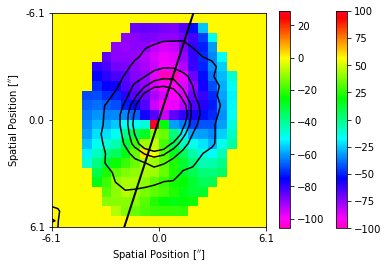

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:54: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


91


"plt.imshow(np.flipud(sig), cmap='gist_rainbow_r')\nplt.colorbar()\nplt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])\nplt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])\nplt.show()\n\nplt.imshow(abs((rotated) - stel_sig_model), cmap='gist_rainbow_r')\n\nplt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])\nplt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])\nplt.colorbar()\nplt.annotate(r'Resids = '+str(round(np.mean(abs(rotated_sig - stel_sig_model)),1)), xy=(0.6,0.95), xycoords='axes fraction')\nplt.show()"

In [965]:
'''
You now need to plot the velocity map to compare it to the 
actual map.
'''

os.chdir(os.path.expanduser('/Volumes/My Passport For Mac/LAURA_SIMS/kinemetry_input/'))

print(os.getcwd())
file_velcirc='myfile_v_'+str(view)+'.txt'

stel_vel_model=np.zeros((size,size))
stel_sig_model=np.zeros((size,size))


with open(file_velcirc, 'r') as f:
    data = f.readlines()
    
    
    x_list_model=[]
    y_list_model=[]
    vel_circ_model=[]
    vel_kin_model=[]
    for line in data:
        words = line.split()
        #print(words)
        if words[6]=='*************************':
            continue
        else:
            x_list_model.append(float(words[0]))
            y_list_model.append(float(words[1]))
            vel_circ_model.append(float(words[6]))
            vel_kin_model.append(float(words[7]))
            
            stel_vel_model[float(words[0])-size/2,float(words[1])-size/2] = float(words[7])
            #stel_sig_model[float(words[0])-size/2,float(words[1])-size/2] = sig[line]
  


'''
~~~~~~~Sigs~~~~~~~
'''
#stel_sig_model=((ma.masked_where(stel_sig_model==0, stel_sig_model)))
plt.imshow(stel_vel_model, cmap='gist_rainbow_r')
plt.xlim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.ylim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.colorbar()

plt.show()


fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.axis('off')
im1=ax1.imshow(np.flipud(contours[x_start-(dia-0.5)/2:x_start+(dia-0.5)/2,y_start-(dia-0.5)/2:y_start+(dia-0.5)/2]), vmin=1,vmax=50,norm=matplotlib.colors.LogNorm())
#plt.colorbar(im1)
#[x_start-size/2:x_start+size/2,y_start-size/2:y_start+size/2]


ax2=fig.add_subplot(122)
ax2.axis('off')
print(size)
size=91
Z = np.array(contours[x_start-size/2:x_start+size/2,y_start-size/2:y_start+size/2])

X, Y = np.meshgrid(x, yz)

levels = np.arange(1, 50, 10)

'''im2=ax2.imshow(np.flipud(stel_vel_all), vmin=-100, vmax=100, cmap='gist_rainbow_r')
ax2.contour(X, Y, np.flipud(Z), levels, colors='black', linewidth=2, zorder=1000)
#plt.colorbar(im2)
#plt.tight_layout()
plt.show()'''

#PA_kin=262.038


ys_kin=[(j-size_cont/2)/math.tan(math.radians(PA_kin))+size_cont/2 for j in x]


'''fig=plt.figure()



ax2=fig.add_subplot(121)
ax2.axis('off')

im2=ax2.imshow((rotated), vmin=-100, vmax=100, cmap='gist_rainbow_r')
#plt.colorbar(im2)
plt.xlim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.ylim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
'''
fig=plt.figure()
ax1=fig.add_subplot(111)
stel_vel_model=((ma.masked_where(stel_vel_model==0, stel_vel_model)))
im1=ax1.imshow((stel_vel_model),vmin=-100, vmax=100, cmap='gist_rainbow_r')
#plt.colorbar(im1)

ax1.contour(X, Y, (Z), levels, colors='black', linewidth=2, zorder=1000)
ax1.plot(x, ys, color='black',lw=2)
ax1.plot(x, ys_kin, color='red',lw=2)
ax1.axis('off')

plt.xlim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.ylim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])

if PA_img < 0:
    PA_img_fill=180+PA_img
else:
    PA_img_fill=PA_img
if PA_kin-90 < 0:
    PA_kin_fill=90-(PA_kin-90)
else:
    PA_kin_fill=PA_kin-90
plt.annotate(r'PA$_{\mathrm{img}} = $'+str(round(PA_img_fill,1)), xy=(-0.25,0.15), xycoords='axes fraction')
plt.annotate(r'PA$_{\mathrm{kin}} = $'+str(round(PA_kin_fill,1)), xy=(-0.25,0.1), xycoords='axes fraction')
plt.colorbar(im1)
#plt.tight_layout()
plt.savefig('../../MaNGA_Papers/Paper_I/PAs_'+str(view)+'.pdf')
plt.clf()




plt.imshow(abs((rotated) - (stel_vel_model)),vmin=-10, vmax=10, cmap='gist_rainbow_r')

plt.xlim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.ylim([size/2-(dia-0.5)/2,size/2+(dia-0.5)/2])
plt.colorbar()
plt.annotate(r'Resids = '+str(round(np.mean(abs((rotated - stel_vel_model)/stel_vel_model)),2)), xy=(0.6,0.95), xycoords='axes fraction')
plt.savefig('../../MaNGA_Papers/Paper_I/vel_resids_'+str(view)+'.pdf')





'''plt.imshow(np.flipud(sig), cmap='gist_rainbow_r')
plt.colorbar()
plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.show()

plt.imshow(abs((rotated) - stel_sig_model), cmap='gist_rainbow_r')

plt.xlim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.ylim([size/2-(dia-0.5),size/2+(dia-0.5)])
plt.colorbar()
plt.annotate(r'Resids = '+str(round(np.mean(abs(rotated_sig - stel_sig_model)),1)), xy=(0.6,0.95), xycoords='axes fraction')
plt.show()'''